# 머신러닝 - 회귀(Regression)

주제
- 특성 공학(스케일링, 인코딩)
- 회귀
- 선형 회귀
- 다중 회귀

## 예제 실습1 - 스케일링(Scaling)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = {
    "height_cm": [150, 160, 170, 180, 190],
    "weight_kg": [50, 60, 70, 80, 90],
    "income": [200, 250, 400, 800, 1500],  # 스케일이 훨씬 큼
}
df = pd.DataFrame(data)

# 1. StandardScaler로 스케일링
ss = StandardScaler() # 스케일러 생성
ss_df = ss.fit_transform(df) # 인자에 스케일링할 2차원 데이터
df_std = pd.DataFrame(ss_df, columns=df.columns)
print("====standardscaler====") # 평균을 0 표준편차를 1에 가깝게
print(df_std)
print(df_std.describe().T)

# 2. MinMaxScaler로 스케일링
ms = MinMaxScaler()
ms_df = ms.fit_transform(df)
df_mms = pd.DataFrame(ms_df, columns = df.columns)
print("\n=====Min-Max Scaler======") # 최소를 0, 최대를 1에 가깝게
print(df_mms)
print(df_mms.describe().T)

====standardscaler====
   height_cm  weight_kg    income
0  -1.414214  -1.414214 -0.889676
1  -0.707107  -0.707107 -0.786226
2   0.000000   0.000000 -0.475873
3   0.707107   0.707107  0.351733
4   1.414214   1.414214  1.800043
           count  mean       std       min       25%       50%       75%  \
height_cm    5.0   0.0  1.118034 -1.414214 -0.707107  0.000000  0.707107   
weight_kg    5.0   0.0  1.118034 -1.414214 -0.707107  0.000000  0.707107   
income       5.0   0.0  1.118034 -0.889676 -0.786226 -0.475873  0.351733   

                max  
height_cm  1.414214  
weight_kg  1.414214  
income     1.800043  

=====Min-Max Scaler======
   height_cm  weight_kg    income
0       0.00       0.00  0.000000
1       0.25       0.25  0.038462
2       0.50       0.50  0.153846
3       0.75       0.75  0.461538
4       1.00       1.00  1.000000
           count      mean       std  min       25%       50%       75%  max
height_cm    5.0  0.500000  0.395285  0.0  0.250000  0.500000  0.750000 

## 예제 실습2 - 인코딩

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

data = {
    "color": ["red", "blue", "green", "blue", "red"],
    "size": ["S", "M", "L", "M", "L"],   # 순서형 (S < M < L)
    "city": ["Seoul", "Busan", "Seoul", "Incheon", "Busan"],
}

df = pd.DataFrame(data)

# Label Encoding
label_encoder = LabelEncoder()
df['color_label'] = label_encoder.fit_transform(df['color']) 

# ordinal Encoding (순서형)
# 지정할 순서 데이터를 categories 옵션에 추가
size_order = [['S','M','L']]
ordinal_encoder = OrdinalEncoder(categories=size_order)
df['size_label'] = ordinal_encoder.fit_transform(df[['size']])
print(df)

# One-Hot Encoding
ohe_encoder = OneHotEncoder(sparse_output=False)
encoded = ohe_encoder.fit_transform(df[['city']])
df_encoded = pd.DataFrame(encoded, columns=ohe_encoder.get_feature_names_out(['city']))
print(df_encoded)

# df랑 df_encoded랑 합치기
df_merged = pd.merge(df,df_encoded, how='outer', on=df.index)

df_merged


   color size     city  color_label  size_label
0    red    S    Seoul            2         0.0
1   blue    M    Busan            0         1.0
2  green    L    Seoul            1         2.0
3   blue    M  Incheon            0         1.0
4    red    L    Busan            2         2.0
   city_Busan  city_Incheon  city_Seoul
0         0.0           0.0         1.0
1         1.0           0.0         0.0
2         0.0           0.0         1.0
3         0.0           1.0         0.0
4         1.0           0.0         0.0


,key_0,color,size,city,color_label,size_label,city_Busan,city_Incheon,city_Seoul
0,0,red,S,Seoul,2,0.0,0.0,0.0,1.0
1,1,blue,M,Busan,0,1.0,1.0,0.0,0.0
2,2,green,L,Seoul,1,2.0,0.0,0.0,1.0
3,3,blue,M,Incheon,0,1.0,0.0,1.0,0.0
4,4,red,L,Busan,2,2.0,1.0,0.0,0.0


## 예제 실습3 - 단순 선형 회귀 모델
### 아이스크림 판매량 예측
온도가 올라가면 아이스크림 판매량이 증가?





절편 : -1.819
회귀계수 : 3.208
온도가 27일 때 아이스크림 판매량 : 84.79개


c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


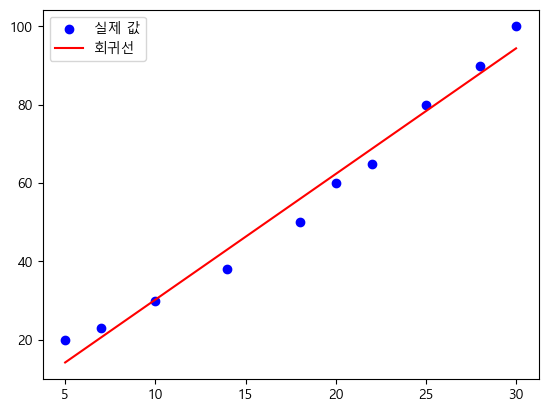

R^2 : 0.9780893943026799
MSE : 15.741455557182599
RMSE : 3.9675503219471078


'\n절편 : -1.819\n회귀계수 : 3.208\n\n따라서 회귀식:\ny = -1.8194 + 3.208*x\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

data = {
    'temperature' : [5,7,10,14,18,20,22,25,28,30],
    'sales' : [20,23,30,38,50,60,65,80,90,100]
}
df = pd.DataFrame(data)


# 1. X, y 정의
X = df[['temperature']] # 반드시 (n,1) 2차원 형태로 가져와야 됨, 독립변수 X 추출
y = df['sales']         # 종속 변수 y 추출
# X = df.drop('sales', axis = 0) # x가 많은 경우 사용될 수 잇음

# 2. 모델 생성 및 학습
model = LinearRegression()
model.fit(X,y)

# 3. 회귀 계수/절편 확인
print(f"절편 : {model.intercept_:.3f}")
print(f"회귀계수 : {model.coef_[0]:.3f}") # 기울기 (co efficient)

# 4. 전체 예측
# 원래느느 여기서 X_test 예측해야 되는데, 훈련 데이터로 예측 그대로 진행
pred =model.predict(X)

# 5. 새로운 값 예측
# 2차원형태로
new_temperature = np.array([[27]]) # 기온이 27일때 아이스크림 판매량은 무엇일까? 
new_pred = model.predict(new_temperature)
print(f"온도가 27일 때 아이스크림 판매량 : {new_pred[0]:.2f}개")

# 6. 시각화
# 데이터 산점도 x축 :온도 / y축 : 판매량
plt.scatter(df['temperature'], df['sales'], color = 'blue', label = '실제 값')
plt.plot(df['temperature'], pred, color = 'red', label= '회귀선')
plt.legend()
plt.show()


# 7. 결과 확인 : R^2-score, MSE, RMSE
# 평가는 실제 y에 대해서 수행
print(f"R^2 : {r2_score(y, pred)}") # 0~1 사이
print(f"MSE : {mean_squared_error(y,pred)}") # 평균 오차 제곱
print(f"RMSE : {np.sqrt(mean_squared_error(y,pred))}")



'''
절편 : -1.819
회귀계수 : 3.208

따라서 회귀식:
y = -1.8194 + 3.208*x
'''


## 단순 선형회귀 - 공부시간과 시험점수

한 학생의 일일 공부시간과 시험점수 간의 관계를 분석하려고 합니다. 공부시간이 시험점수에 어떤 영향을 미치는지 예측 모델을 만들어보세요.
```
공부시간(시간) | 시험점수(점)
1              | 55
2              | 60
3              | 65
4              | 70
5              | 75
6              | 80
7              | 85
8              | 90
```

1. 위 학습 데이터로 모델을 학습시키세요.
2. 공부시간이 9시간일 때 예상 점수를 예측하세요.
3. 산점도와 회귀선(Regression Line)을 그래프로 시각화하세요.
4. 모델의 성능(R Squared Score)을 확인하세요.



기울기(계수): 5.00
절편: 50.00
예측 점수: 95.0
R^2 점수: 1.0000


c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


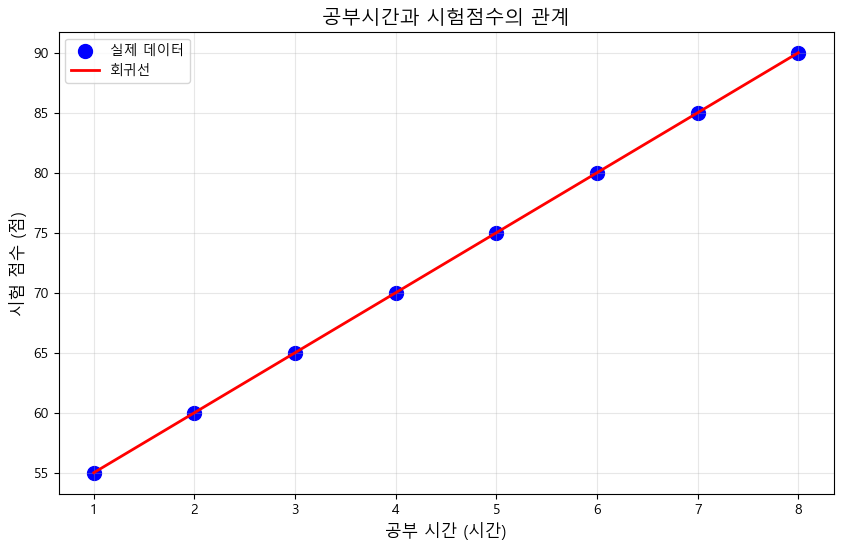

y = 5.00x + 50.00


In [4]:
# 1. 라이브러리 불러오기
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 2. 데이터셋 정의
df = pd.DataFrame({
    'study_hours' : [1, 2, 3, 4, 5, 6, 7, 8],
    'test_score' : [55, 60, 65, 70, 75, 80, 85, 90]
})

# 3. 데이터 준비하기 (X, y)
X = df[['study_hours']] # 독립변수: 2차원 형태로 만드세요.
y = df['test_score'] # 종속변수

# 4. 모델 생성 후, 학습을 진행하세요!
model = LinearRegression()
model.fit(X,y)

# 5. 모델 파라미터 출력하기 (절편, 기울기(계수))
print(f"기울기(계수): {model.coef_[0]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 6. 예측하기
# 예측용 테스트 데이터
new_study_hours = np.array([[9]]) # 2차원 형태

# 예측하기
predicted_score = model.predict(new_study_hours)
print(f'예측 점수: {predicted_score[0]}')

# 7. 성능 평가
y_pred = model.predict(X) # 데이터 X에 대해 예측하기

r2 = r2_score(y, y_pred) # R2 score
print(f'R^2 점수: {r2:.4f}')

# 8. 시각화 (산점도와 회귀선에 대한 선 그래프)
plt.figure(figsize=(10, 6))
# 산점도 
plt.scatter(df['study_hours'], y_pred, color='blue', label='실제 데이터', s=100)

# 구한 회귀선을 선 그래프로
plt.plot(df['study_hours'], y_pred, color='red', linewidth=2, label='회귀선')

plt.xlabel('공부 시간 (시간)', fontsize=12)
plt.ylabel('시험 점수 (점)', fontsize=12)
plt.title('공부시간과 시험점수의 관계', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 9. 회귀식 출력 (y = ax + b 형태)
print(f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

## 다중 선형 회귀 - 아파트 가격 예측

아파트의 면적, 방 개수, 건축연수를 바탕으로 가격을 예측하는 모델을 만들어보세요.

```
면적(㎡) | 방개수 | 건축연수(년) | 가격(백만원)
60       | 2      | 5            | 300
75       | 3      | 3            | 400
85       | 3      | 10           | 380
100      | 4      | 2            | 520
110      | 4      | 7            | 480
120      | 4      | 15           | 450
130      | 5      | 5            | 580
140      | 5      | 12           | 550
```

1. 위 데이터로 다중회귀 모델을 학습시키세요
2. 면적 95㎡, 방 3개, 건축연수 8년인 아파트의 가격을 예측하세요
3. 각 특성(면적, 방개수, 건축연수)의 회귀계수를 확인하세요
4. 어떤 특성이 가격에 가장 큰 영향을 미치는지 분석하세요
5. 모델의 성능(R² 점수, MSE)을 평가하세요

 area 계수: -0.81
 rooms 계수: 113.63
 age 계수: -3.36
절편: 139.14
예측 결과:
면적: 95㎡, 방: 3개, 건축연수: 8년
예상 가격: 376.24
모델 성능:
R^2 점수: 0.9944
평균 제곱 오차(MSE): 43.18
평균 제곱근 오차(RMSE): 6.57


c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


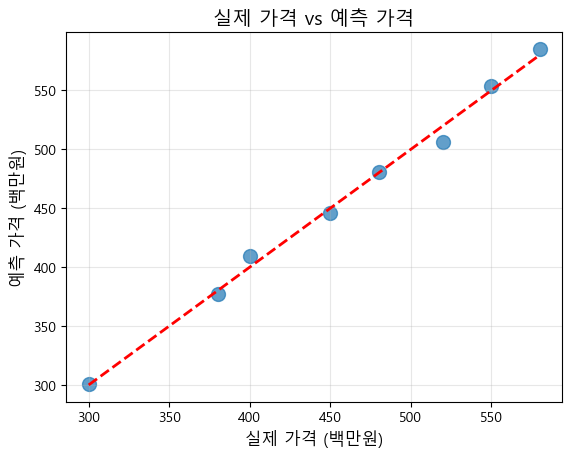

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. 데이터 불러오기
data = {
    "area" : [60, 75, 85, 100, 110, 120, 130, 140],
    "rooms": [2, 3, 3, 4, 4, 4, 5, 5],
    "age": [5, 3, 10, 2, 7, 15, 5, 12],
    "price": [300, 400, 380, 520, 480, 450, 580, 550]
}
df = pd.DataFrame(data)

# 데이터 살펴보기


# 2. 데이터 준비 X, y 데이터 
X = df.drop("price", axis = 1) # 독립변수(면적, 방개수, 건축연수) 3개 컬럼 추출 
y = df['price'] # 종속변수 (가격)

# 3. 모델 생성 및 학습
model = LinearRegression()

model.fit(X,y)


# 4. 모델 파라미터(계수, 절편) 확인
for feature, coef in zip(X.columns, model.coef_):
    print(f" {feature} 계수: {coef:.2f}")
print(f"절편: {model.intercept_:.2f}")


# 6. 새로운 데이터 예측
# 원하면 데이터를 추가해보세요!
new_apartment = np.array([[95, 3, 8]])  # 95㎡, 방3개, 8년일 때!?

predicted_price = model.predict(new_apartment)
print(f"예측 결과:")
print(f"면적: 95㎡, 방: 3개, 건축연수: 8년")
print(f"예상 가격: {predicted_price[0]:.2f}")

# 7. 모델 성능 평가
y_pred = model.predict(X) # X에 대해 예측을 진행하세요.

r2 = r2_score(y, y_pred) # R^2 Score
mse = mean_squared_error(y, y_pred) # MSE
rmse = np.sqrt(mse) # RMSE

print(f"모델 성능:")
print(f"R^2 점수: {r2:.4f}")
print(f"평균 제곱 오차(MSE): {mse:.2f}")
print(f"평균 제곱근 오차(RMSE): {rmse:.2f}")

# 8. 시각화: 실제값 vs 예측값

# 실제 값과 예측 값에 대한 산점도를 그리세요!
# x축: 실제 값, y축: 예측 값
plt.scatter(y, y_pred, alpha=0.7, s=100)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('실제 가격 (백만원)', fontsize=12)
plt.ylabel('예측 가격 (백만원)', fontsize=12)
plt.title('실제 가격 vs 예측 가격', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

## 집 전기요금 예측
현대 가정에서는 전기사용량이 꾸준히 증가하면서 전기요금 관리가 중요한 이슈가 되고 있습니다.
특히 가전제품 사용량 증가, 계절 변화에 따른 냉·난방 기기 사용, 가구 형태의 다양화 등으로 인해 전기요금의 변동 폭이 커졌습니다.

가정의 전기 사용 패턴을 기반으로 전기요금을 예측하는 회귀 모델을 만들어보는 것이 목표입니다.
전력 사용량(kWh), 집에 있는 가전제품의 수, 평균 기온과 같은 변수들이 전기요금에 어떤 영향을 미치는지 분석하고,이를 통해 새로운 가정의 전기요금을 예측해보게 됩니다.

- usage_kwh: 월 전력 사용량 (kWh)
- appliance_cnt: 가전제품 수
- temperature: 평균기온(°C)
- bill: 월 전기요금(만원)

| usage_kwh | appliance_cnt | temperature | bill |
| --- | --- | --- | --- |
| 250 | 5 | 5 | 4.2 |
| 300 | 6 | 10 | 4.8 |
| 150 | 4 | 15 | 3.1 |
| 400 | 8 | 0 | 6.0 |
| 350 | 7 | 8 | 5.4 |
| 200 | 4 | 12 | 3.5 |
| 100 | 3 | 18 | 2.7 |
| 450 | 9 | -2 | 6.8 |

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

electric_data = {
    "usage_kwh": [250,300,150,400,350,200,100,450],
    "appliance_cnt": [5,6,4,8,7,4,3,9],
    "temperature": [5,10,15,0,8,12,18,-2],
    "bill": [4.2,4.8,3.1,6.0,5.4,3.5,2.7,6.8]
}
df_elec = pd.DataFrame(electric_data)

# 데이터를 X, y로 분리 (누가 독립변수들? 누가 종속변수?)
X = df_elec.drop('bill', axis = 1)
# X = df_elec[['usage_kwh', 'appliance_cnt', 'temperature']] 
y = df_elec['bill']

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀 계수와 절편 출력하기
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

# 새 집 예상 전기요금
new_house = np.array([[320, 6, 9]]) # 예측용 테스트 데이터(필요시 더 추가해보세요!)

pred = model.predict(new_house) # 예측하기
print("예상 전기요금:", pred[0])

회귀 계수: [ 0.00583509  0.33251462 -0.00473684]
절편: 1.0849707602339183
예상 전기요금: 4.904654970760234


c:\Users\USER\miniconda3\envs\learn_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 의료보험료 예측

의료보험 시스템에서는 각 개인의 건강 상태, 생활 습관, 인구통계학적 요인에 따라 산출되는 보험료가 매우 다양합니다.
예를 들어 나이, BMI(체질량 지수), 흡연 여부, 자녀 수, 거주 지역 등은 보험료에 큰 영향을 미치는 요소로 잘 알려져 있습니다.

Medical Cost Personal Dataset(insurance.csv) 를 활용하여
개인의 특성 정보를 기반으로 의료보험료를 예측하는 회귀 모델을 직접 구축해봅시다.

`None으로 되어있는 부분을 직접 채워봅시다!`

0. 데이터셋을 읽고 간단한 탐색(EDA)을 진행합니다. 
  - 구조 파악
  - 결측치 탐색 후, 만약에 있다면 처리하기

1. X 데이터(독립 변수)와 y 데이터(종속 변수)를 분리합니다.
2. 범주형 변수에 대해 모델 학습을 위해 OneHotEncoder로 인코딩을 진행합니다.
  - 'sex', 'smoker', 'region'
3. 수치형 변수에 대해 모델 학습을 위해 StandardScaler로 스케일링을 진행합니다.
  - 'age', 'bmi', 'children'
4. 2,3번이 진행된 결과에 train_test_split으로 훈련 데이터와 테스트 데이터를 분리합니다. (8:2 비율로)
5. LinearRegression 모델을 생성 후, 학습합니다. 
6. 테스트 데이터에 대해 학습된 모델에 예측을 진행합니다. 
  - 예측 후, y_test와 y_predicted를 데이터프레임 형태로 출력합니다.
7. 최종적으로 mean_squared_error와 r2_score로 모델의 성능을 출력합니다. 


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 로드
df = pd.read_csv("../1120/data/insurance.csv")

# 0. 간단한 EDA (구조 파악 및 결측치 탐색)
print("---shape 확인---")
print(df.shape)
print("\n---상위 5개 확인---")
print(df.head())
print("\n---Dtype이랑 결측치확인---")
print(df.info())

# 1. X, y 분리 (drop을 활용하세요!)
X = df.drop("charges", axis=1)
y = df["charges"]

# 스케일링할 컬럼 이름 목록을 리스트를 정의하세요
num_cols = ['age','bmi', 'children']
# 인코딩할 컬럼 이름 목록을 리스트로 정의하세요
cat_cols = ['sex','smoker','region']

# 2. 원핫 인코딩
# 인코더 생성하기
ohe = OneHotEncoder()
# 인코딩할 컬럼만 따로 추출하세요
X_categories = X[cat_cols]
# 원핫 인코딩 수행하기
X_cat_encoded = ohe.fit_transform(X_categories).toarray()

# 3. 스케일링(Z-Score)
# 스케일러 생성하기
scaler = StandardScaler()
# 스케일링할 컬럼만 따로 추출하세요
X_nums = X[num_cols]
# 스케일링 수행하기
X_num_scaled = scaler.fit_transform(X_nums)

# [수정 금지] 인코딩한 결과와 스케일링한 결과 합치기
# X_final: 스케일링/인코딩을 수행한 최종 결과 데이터
X_final = np.concatenate([X_num_scaled, X_cat_encoded], axis=1)

# 4. 훈련, 테스트 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 5. 회귀 모델 생성 후, 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 6. 예측 진행
pred = model.predict(X_test)

# 실제 값과 예측 값 비교하는 데이터프레임 생성
result = pd.DataFrame({
    'y_actual' : y_test,
    'y_predicted' : pred
})
print(result)

# 7. 평가 진행 및 결과 출력
# -실제 값과 예측 값과의 오차에 대한 평가
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse) # RMSE
print(r2_score(y_test, pred)) # R2 Score

---shape 확인---
(1338, 7)

---상위 5개 확인---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

---Dtype이랑 결측치확인---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
         y_actual   y_predict